In [38]:
import subprocess
import pandas as pd
import os

In [35]:
for method in ['cascada', 'mcmc', 'hotflip', 'random']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 2)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'

    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

    print(method, ":", result.stdout.decode('utf-8'))

cascada : {'accuracy_drop': 0.041000000000000036, 'probability_drop': 0.03534953742149777, 'WER': 0.731, 'NAD': 0.02918571646732761}

mcmc : {'accuracy_drop': 0.06399999999999995, 'probability_drop': 0.056384669227768115, 'WER': 1.024, 'NAD': 0.06197553502420822}

hotflip : {'accuracy_drop': 0.789, 'probability_drop': 0.6462328299128951, 'WER': 6.472, 'NAD': 0.16620521013092537}

random : {'accuracy_drop': 0.06399999999999995, 'probability_drop': 0.05553518383880777, 'WER': 1.094, 'NAD': 0.06226157614262929}



In [47]:
df = pd.read_csv('data/ag_news/test.csv')

In [78]:
base_dir = 'results/ag_news_results'
for method in ['cascada']:
    xs = os.listdir(os.path.join(base_dir, method))
    x = sorted(xs)[-1]
    res_path = os.path.join(base_dir, method, x, 'results.csv')
    print(res_path)
    res = pd.read_csv(res_path)
    del res['label']
    del res['sequence']
    dfr = res.join(df, how='left')
    dfr.rename(columns={'labels':'label', 'sequences':'sequence'}, inplace=True)
    dfr.to_csv(res_path, index=False)

results/ag_news_results/cascada/20200217_195303/results.csv


In [79]:
for method in ['cascada']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 2)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'

    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

    print(method, ":", result.stdout.decode('utf-8'))

cascada : {'accuracy_drop': 0.721, 'probability_drop': 0.5525898447096369, 'WER': 6.9, 'NAD': 0.14697185761203838}



In [84]:
for method in ['cascada']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 4 | head -n 1)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(method, ":", result.stdout.decode('utf-8'))
    
    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 4 | head -n 1)" && cat ${BASE}/${FOLDER}/args.json'
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(method, ":", result.stdout.decode('utf-8'))
    
    

cascada : {'accuracy_drop': 0.634, 'probability_drop': 0.49027662298054747, 'WER': 5.289, 'NAD': 0.1522005885049933}

cascada : {
  "cuda": 0,
  "csv_path": "data/ag_news/test.csv",
  "results_path": "results/ag_news_results/cascada",
  "copynet_path": "experiments/ag_news/nonmasked_copynet_with_attention",
  "classifier_path": "experiments/ag_news/classification_copynet",
  "levenshtein_path": "experiments/ag_news/deep_levenshtein_copynet",
  "levenshtein_weight": 0.1,
  "learning_rate": 3.0,
  "max_steps": 30,
  "num_updates": 5,
  "beam_size": 30,
  "maskers": "Identity",
  "early_stopping": false,
  "sample": 1000
}


## make cascada grisearch

In [101]:
levenshtein_weights = [0.1, 1, 10]
beam_sizes = [1, 30, 100]
max_stepss = [5, 30, 100]
learning_rates = [1, 2, 4]

In [102]:
import itertools

In [103]:
params = list(itertools.product(levenshtein_weights, beam_sizes, max_stepss, learning_rates))

In [104]:
len(params)

81

In [107]:
from tqdm import tqdm

In [108]:
for p in tqdm(params):
    print(p)
    levenshtein_weight, beam_size, max_steps, learning_rate = p
    cmd = \
    f'''
    python run_cascada.py 
    --csv_path data/ag_news/test.csv 
    --results_path results/ag_news_results/cascada 
    --classifier_path experiments/ag_news/classification_copynet 
    --levenshtein_path experiments/ag_news/deep_levenshtein_copynet 
    --copynet_path experiments/ag_news/nonmasked_copynet_with_attention 
    --levenshtein_weight {levenshtein_weight}
    --beam_size {beam_size} 
    --max_steps {max_steps}
    --cuda 0 
    --num_updates 5 
    --learning_rate {learning_rate} 
    --sample 100
    '''.replace('\n','')
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

  0%|          | 0/81 [00:00<?, ?it/s]

(0.1, 1, 5, 1)


  1%|          | 1/81 [00:09<13:11,  9.89s/it]

(0.1, 1, 5, 2)


  2%|▏         | 2/81 [00:18<12:29,  9.49s/it]

(0.1, 1, 5, 4)


  4%|▎         | 3/81 [00:27<12:20,  9.49s/it]

(0.1, 1, 30, 1)


  5%|▍         | 4/81 [01:00<21:01, 16.38s/it]

(0.1, 1, 30, 2)


  6%|▌         | 5/81 [01:35<27:58, 22.09s/it]

(0.1, 1, 30, 4)


  7%|▋         | 6/81 [02:17<34:46, 27.82s/it]

(0.1, 1, 100, 1)


  9%|▊         | 7/81 [03:59<1:02:07, 50.37s/it]

(0.1, 1, 100, 2)


 10%|▉         | 8/81 [05:49<1:22:56, 68.17s/it]

(0.1, 1, 100, 4)


 11%|█         | 9/81 [07:54<1:42:08, 85.12s/it]

(0.1, 30, 5, 1)


 12%|█▏        | 10/81 [08:05<1:14:36, 63.05s/it]

(0.1, 30, 5, 2)


 14%|█▎        | 11/81 [08:16<55:11, 47.30s/it]  

(0.1, 30, 5, 4)


 15%|█▍        | 12/81 [08:28<42:13, 36.72s/it]

(0.1, 30, 30, 1)


 16%|█▌        | 13/81 [09:14<44:53, 39.61s/it]

(0.1, 30, 30, 2)


 17%|█▋        | 14/81 [10:02<46:51, 41.96s/it]

(0.1, 30, 30, 4)


 19%|█▊        | 15/81 [11:00<51:36, 46.92s/it]

(0.1, 30, 100, 1)


 20%|█▉        | 16/81 [13:31<1:24:25, 77.93s/it]

(0.1, 30, 100, 2)


 21%|██        | 17/81 [16:02<1:46:40, 100.01s/it]

(0.1, 30, 100, 4)


 22%|██▏       | 18/81 [19:05<2:11:02, 124.81s/it]

(0.1, 100, 5, 1)


 23%|██▎       | 19/81 [19:21<1:35:12, 92.14s/it] 

(0.1, 100, 5, 2)


 25%|██▍       | 20/81 [19:36<1:10:18, 69.16s/it]

(0.1, 100, 5, 4)


 26%|██▌       | 21/81 [19:56<54:20, 54.34s/it]  

(0.1, 100, 30, 1)


 27%|██▋       | 22/81 [21:08<58:46, 59.77s/it]

(0.1, 100, 30, 2)


 28%|██▊       | 23/81 [22:24<1:02:24, 64.56s/it]

(0.1, 100, 30, 4)


 30%|██▉       | 24/81 [23:59<1:09:59, 73.68s/it]

(0.1, 100, 100, 1)


 31%|███       | 25/81 [27:53<1:53:44, 121.87s/it]

(0.1, 100, 100, 2)


 32%|███▏      | 26/81 [31:57<2:25:18, 158.51s/it]

(0.1, 100, 100, 4)


 33%|███▎      | 27/81 [36:52<2:59:29, 199.44s/it]

(1, 1, 5, 1)


 35%|███▍      | 28/81 [37:01<2:05:37, 142.22s/it]

(1, 1, 5, 2)


 36%|███▌      | 29/81 [37:11<1:28:53, 102.57s/it]

(1, 1, 5, 4)


 37%|███▋      | 30/81 [37:21<1:03:28, 74.68s/it] 

(1, 1, 30, 1)


 38%|███▊      | 31/81 [37:56<52:24, 62.89s/it]  

(1, 1, 30, 2)


 40%|███▉      | 32/81 [38:32<44:49, 54.89s/it]

(1, 1, 30, 4)


 41%|████      | 33/81 [39:14<40:37, 50.78s/it]

(1, 1, 100, 1)


 42%|████▏     | 34/81 [41:02<53:22, 68.14s/it]

(1, 1, 100, 2)


 43%|████▎     | 35/81 [42:55<1:02:33, 81.59s/it]

(1, 1, 100, 4)


 44%|████▍     | 36/81 [45:04<1:11:52, 95.83s/it]

(1, 30, 5, 1)


 46%|████▌     | 37/81 [45:14<51:27, 70.17s/it]  

(1, 30, 5, 2)


 47%|████▋     | 38/81 [45:25<37:30, 52.34s/it]

(1, 30, 5, 4)


 48%|████▊     | 39/81 [45:39<28:28, 40.68s/it]

(1, 30, 30, 1)


 49%|████▉     | 40/81 [46:23<28:32, 41.77s/it]

(1, 30, 30, 2)


 51%|█████     | 41/81 [47:14<29:37, 44.45s/it]

(1, 30, 30, 4)


 52%|█████▏    | 42/81 [48:12<31:39, 48.69s/it]

(1, 30, 100, 1)


 53%|█████▎    | 43/81 [50:36<48:57, 77.30s/it]

(1, 30, 100, 2)


 54%|█████▍    | 44/81 [53:14<1:02:32, 101.42s/it]

(1, 30, 100, 4)


 56%|█████▌    | 45/81 [56:23<1:16:32, 127.58s/it]

(1, 100, 5, 1)


 57%|█████▋    | 46/81 [56:38<54:49, 94.00s/it]   

(1, 100, 5, 2)


 58%|█████▊    | 47/81 [56:58<40:35, 71.64s/it]

(1, 100, 5, 4)


 59%|█████▉    | 48/81 [57:18<30:58, 56.32s/it]

(1, 100, 30, 1)


 60%|██████    | 49/81 [58:31<32:39, 61.24s/it]

(1, 100, 30, 2)


 62%|██████▏   | 50/81 [59:51<34:30, 66.79s/it]

(1, 100, 30, 4)


 63%|██████▎   | 51/81 [1:01:32<38:33, 77.12s/it]

(1, 100, 100, 1)


 64%|██████▍   | 52/81 [1:05:27<1:00:05, 124.32s/it]

(1, 100, 100, 2)


 65%|██████▌   | 53/81 [1:09:44<1:16:35, 164.14s/it]

(1, 100, 100, 4)


 67%|██████▋   | 54/81 [1:15:04<1:34:55, 210.94s/it]

(10, 1, 5, 1)


 68%|██████▊   | 55/81 [1:15:14<1:05:21, 150.81s/it]

(10, 1, 5, 2)


 69%|██████▉   | 56/81 [1:15:24<45:09, 108.38s/it]  

(10, 1, 5, 4)


 70%|███████   | 57/81 [1:15:34<31:36, 79.03s/it] 

(10, 1, 30, 1)


 72%|███████▏  | 58/81 [1:16:14<25:46, 67.22s/it]

(10, 1, 30, 2)


 73%|███████▎  | 59/81 [1:16:54<21:43, 59.24s/it]

(10, 1, 30, 4)


 74%|███████▍  | 60/81 [1:17:42<19:28, 55.65s/it]

(10, 1, 100, 1)


 75%|███████▌  | 61/81 [1:19:51<25:56, 77.85s/it]

(10, 1, 100, 2)


 77%|███████▋  | 62/81 [1:22:05<29:55, 94.53s/it]

(10, 1, 100, 4)


 78%|███████▊  | 63/81 [1:24:42<33:59, 113.28s/it]

(10, 30, 5, 1)


 79%|███████▉  | 64/81 [1:24:53<23:26, 82.74s/it] 

(10, 30, 5, 2)


 80%|████████  | 65/81 [1:25:06<16:25, 61.62s/it]

(10, 30, 5, 4)


 81%|████████▏ | 66/81 [1:25:21<11:54, 47.65s/it]

(10, 30, 30, 1)


 83%|████████▎ | 67/81 [1:26:18<11:46, 50.48s/it]

(10, 30, 30, 2)


 84%|████████▍ | 68/81 [1:27:17<11:30, 53.08s/it]

(10, 30, 30, 4)


 85%|████████▌ | 69/81 [1:28:26<11:35, 57.94s/it]

(10, 30, 100, 1)


 86%|████████▋ | 70/81 [1:31:40<18:06, 98.77s/it]

(10, 30, 100, 2)


 88%|████████▊ | 71/81 [1:35:03<21:38, 129.83s/it]

(10, 30, 100, 4)


 89%|████████▉ | 72/81 [1:38:58<24:12, 161.42s/it]

(10, 100, 5, 1)


 90%|█████████ | 73/81 [1:39:18<15:53, 119.13s/it]

(10, 100, 5, 2)


 91%|█████████▏| 74/81 [1:39:39<10:27, 89.58s/it] 

(10, 100, 5, 4)


 93%|█████████▎| 75/81 [1:40:03<07:00, 70.04s/it]

(10, 100, 30, 1)


 94%|█████████▍| 76/81 [1:41:48<06:41, 80.40s/it]

(10, 100, 30, 2)


 95%|█████████▌| 77/81 [1:43:38<05:57, 89.32s/it]

(10, 100, 30, 4)


 96%|█████████▋| 78/81 [1:45:49<05:05, 101.92s/it]

(10, 100, 100, 1)


 98%|█████████▊| 79/81 [1:51:57<06:03, 181.56s/it]

(10, 100, 100, 2)


 99%|█████████▉| 80/81 [1:58:18<04:01, 241.55s/it]

(10, 100, 100, 4)


100%|██████████| 81/81 [2:05:24<00:00, 92.90s/it] 


In [109]:
df = pd.read_csv('data/ag_news/test.csv')

In [115]:
base_dir = 'results/ag_news_results'
for method in ['cascada']:
    xs = os.listdir(os.path.join(base_dir, method))
    for x in xs:
        if x != 'backup':
            res_path = os.path.join(base_dir, method, x, 'results.csv')
            res_path_backup = res_path.replace('.csv', '_backup.csv')
            if os.path.exists(res_path_backup):
                res = pd.read_csv(res_path_backup)
            else:
                res = pd.read_csv(res_path)
            res.to_csv(res_path.replace('.csv', '_backup.csv'))
            del res['label']
            del res['sequence']
            dfr = res.join(df, how='left')
            dfr.rename(columns={'labels':'label', 'sequences':'sequence'}, inplace=True)
            dfr.to_csv(res_path, index=False)

In [ ]:
# for method in ['cascada']:
#     base = os.path.join(base_dir, method)
#     for folder in os.listdir(base):
#         cmd = f'python eval.py -mp {base_dir}/logit_tfidf.model -arp {base}/{folder}/results.csv -erp {base}/{folder}/eval_metric.json'
#         result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
#         print(method, ":", result.stdout.decode('utf-8'))

In [122]:
from eval import calculate_nad, calculate_metrics
import joblib
import json
from adat.models.classification_model import LogisticRegressionOnTfIdf

In [125]:
model = joblib.load(f'results/ag_news/logit_tfidf.model')

for method in ['cascada']:
    base = os.path.join(base_dir, method)
    for folder in os.listdir(base):
        if folder != 'backup':
            attack_results_path = f'{base}/{folder}/results.csv'
            eval_results_path = f'{base}/{folder}/eval_metric.json'
            df = pd.read_csv(attack_results_path)
            metrics = calculate_metrics(model, 
                                    df['label'].values, 
                                    df['sequence'].values,
                                    df['generated_sequence'].values)
            json.dump(metrics, open(eval_results_path, 'w'))

In [129]:
result = []
for method in ['cascada']:
    base = os.path.join(base_dir, method)
    for folder in os.listdir(base):
        if folder != 'backup':
            args = json.load(open(os.path.join(base, folder, 'args.json')))
            metrics = json.load(open(os.path.join(base, folder, 'eval_metric.json')))
            args.update(metrics)
            result.append({k:args[k] for k in ['accuracy_drop', 'probability_drop', 'WER', 'NAD',
                                               'levenshtein_weight', 'beam_size', 'max_steps', 'learning_rate']})
result = pd.DataFrame(result)

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
result

,accuracy_drop,probability_drop,WER,NAD,levenshtein_weight,beam_size,max_steps,learning_rate
0,0.13,0.122281,1.41,0.057281,0.1,100,5,1.0
1,0.26,0.221984,2.41,0.108153,0.1,1,5,1.0
2,0.41,0.345154,3.28,0.128516,10.0,30,100,2.0
3,0.43,0.359885,3.36,0.130551,10.0,30,5,2.0
4,0.34,0.313319,2.97,0.114438,1.0,100,30,2.0
...,...,...,...,...,...,...,...,...
76,0.34,0.311664,3.02,0.126066,0.1,100,100,2.0
77,0.38,0.333439,3.14,0.127824,10.0,100,100,2.0
78,0.73,0.584953,7.48,0.135863,10.0,1,5,4.0
79,0.69,0.538525,5.60,0.158225,10.0,100,5,4.0


In [136]:
sns.set()

In [141]:
base_dir

'results/ag_news_results'

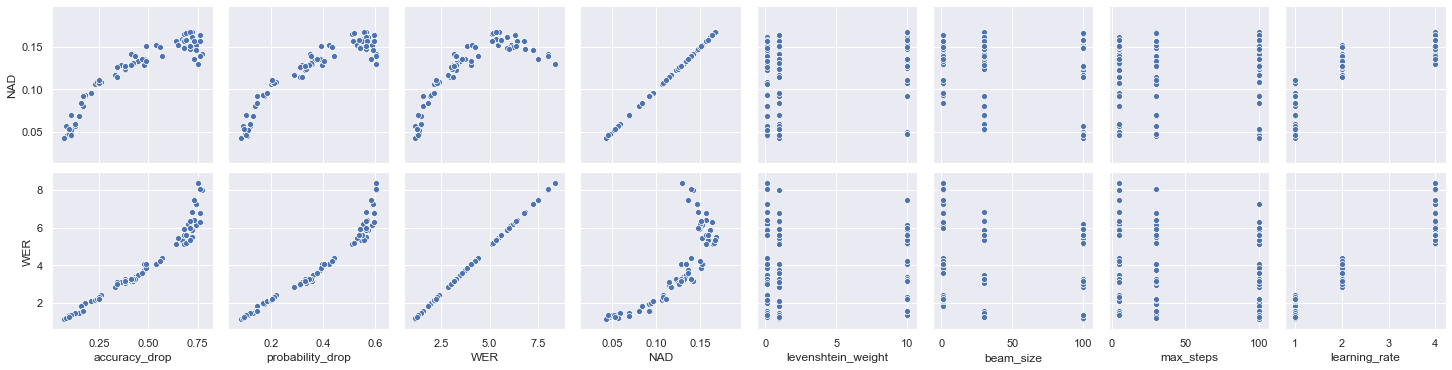

In [144]:
g = sns.pairplot(result, x_vars=result.columns.values, y_vars=['NAD', 'WER'])
plt.savefig(os.path.join(base_dir, 'stats.png'), dpi=150, bbox_inches='tight')

In [146]:
result.sort_values(by='NAD', ascending=False)

,accuracy_drop,probability_drop,WER,NAD,levenshtein_weight,beam_size,max_steps,learning_rate
33,0.72,0.566426,5.50,0.167528,10.0,30,30,4.0
51,0.71,0.557898,5.33,0.166994,10.0,30,100,4.0
48,0.69,0.518521,5.18,0.165818,10.0,100,30,4.0
23,0.68,0.512057,5.13,0.164493,10.0,100,100,4.0
58,0.76,0.596435,6.32,0.163406,1.0,1,100,4.0
...,...,...,...,...,...,...,...,...
40,0.10,0.101674,1.34,0.047287,10.0,100,30,1.0
19,0.09,0.100596,1.25,0.046512,0.1,100,100,1.0
69,0.11,0.105858,1.33,0.045930,1.0,100,5,1.0
16,0.11,0.109903,1.30,0.044961,0.1,100,30,1.0
